<a href="https://colab.research.google.com/github/vigneshwarjayabal/NLP/blob/main/Deep_Learning_for_NPL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

- Understand baic overview of Deep Learnig.

- Understand basic of LSTM and RNN

- Use LSTM to generate text from source corpus.

- Create QA chat BOts with python.

A corpus (plural: corpora) is a collection of text data used for Natural Language Processing (NLP) tasks. It can be a large dataset of documents, sentences, or words used to train machine learning models, analyze language, or perform text processing.



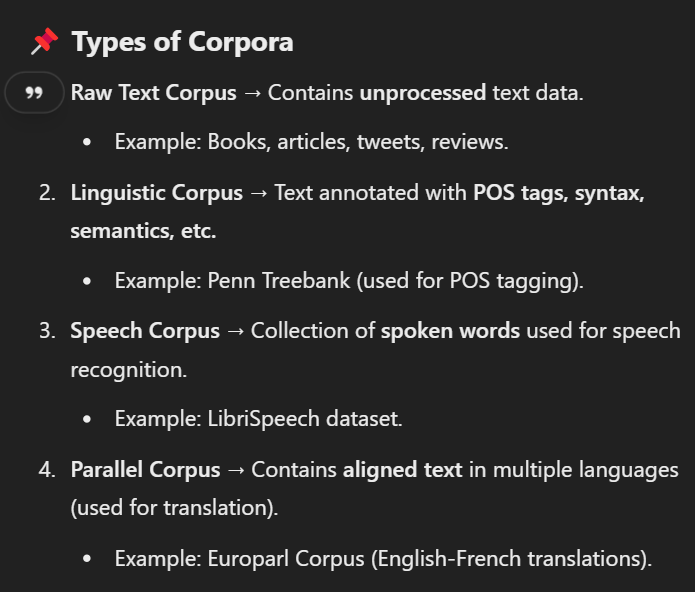

#**Recurrent Neural Network**

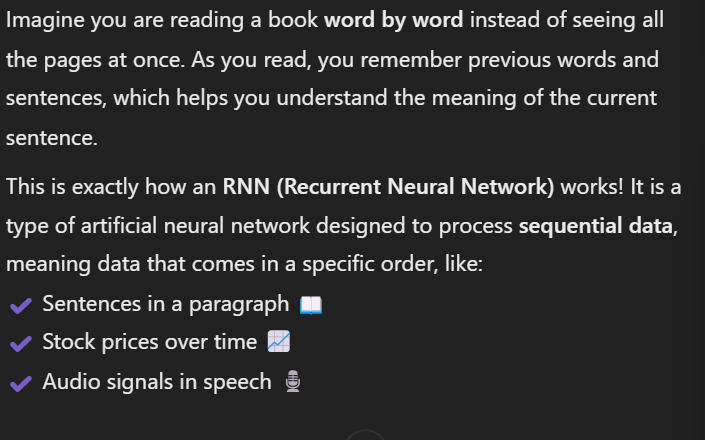

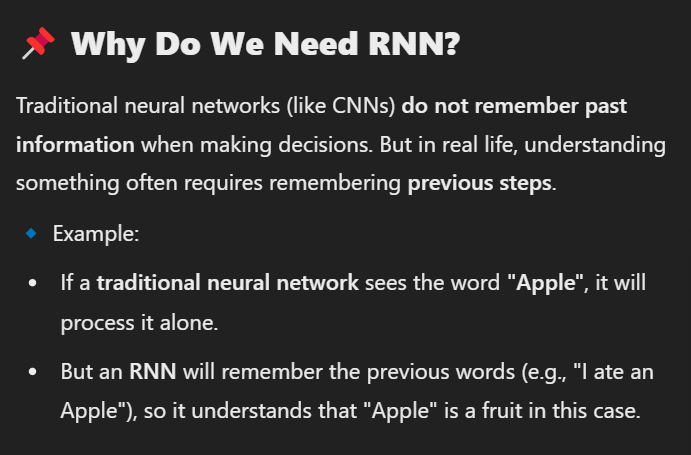

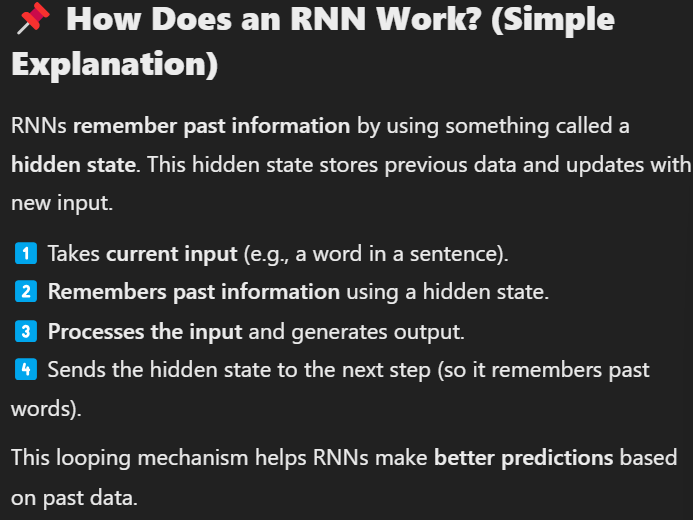

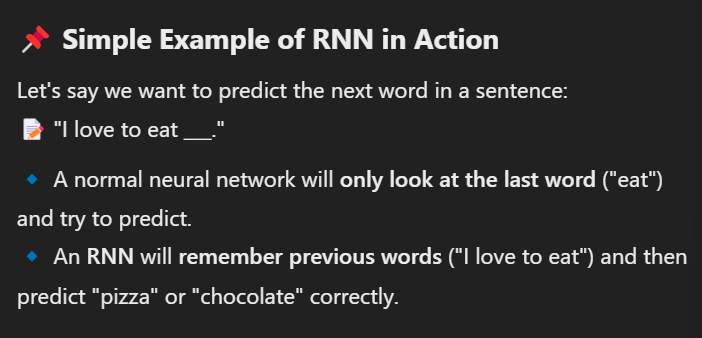

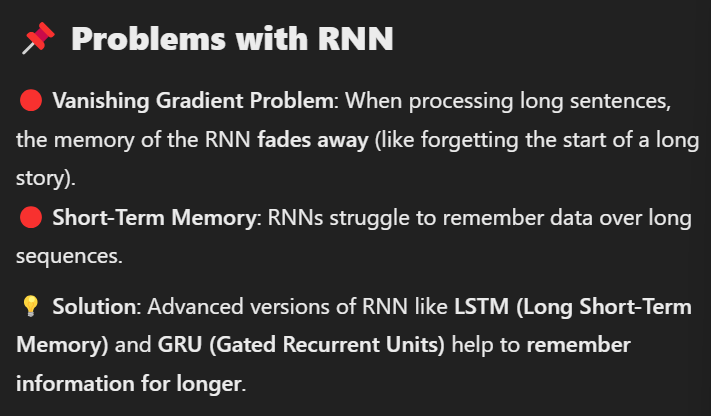

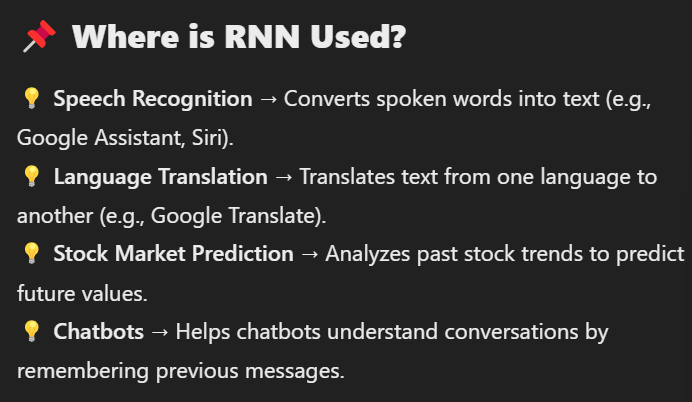

#**Long Short-Term Memory**

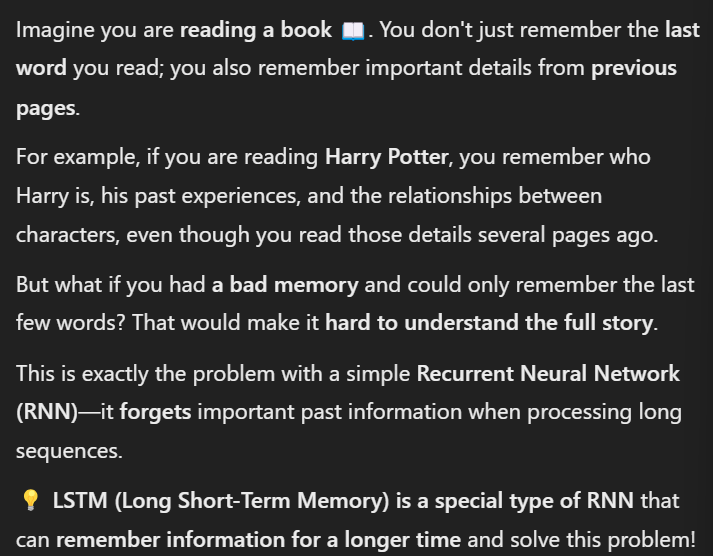

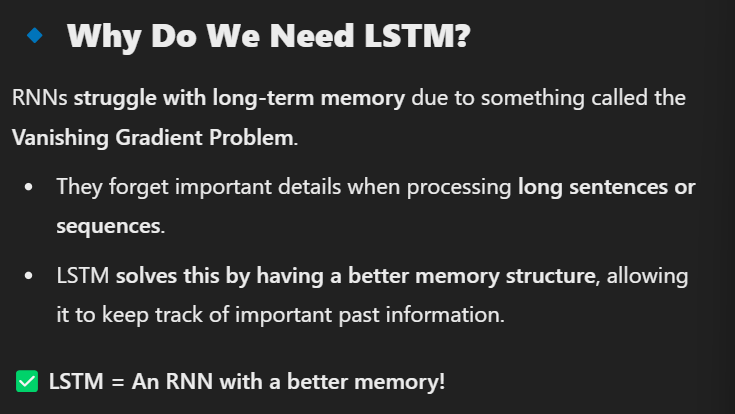

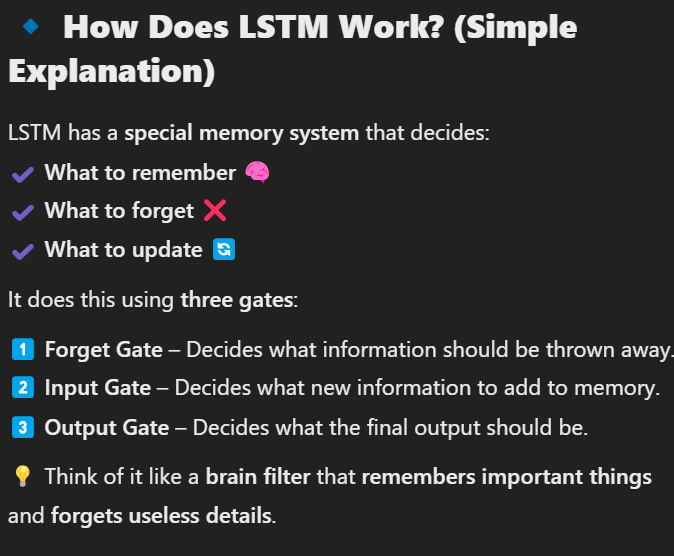

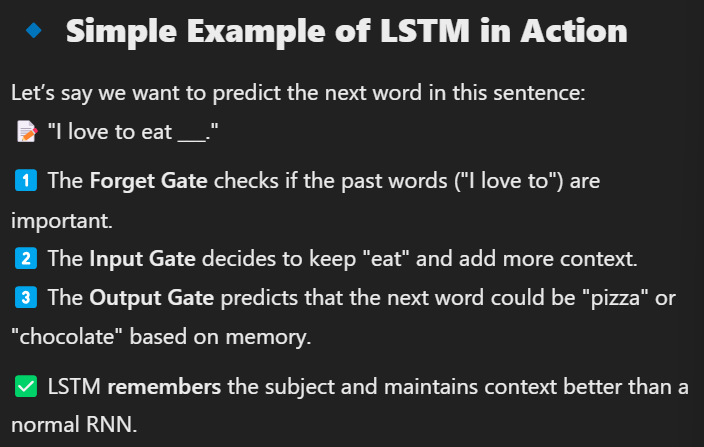

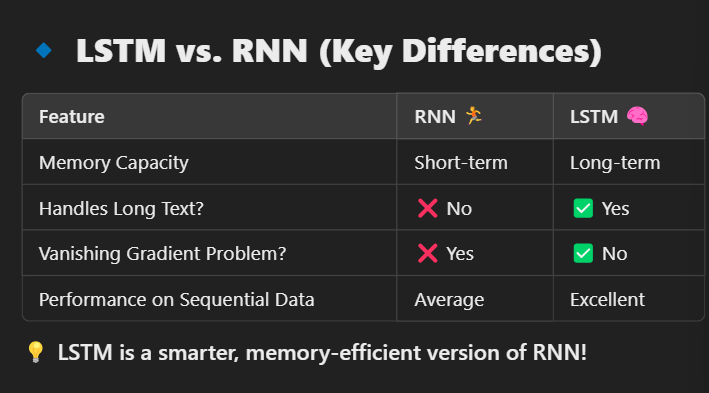

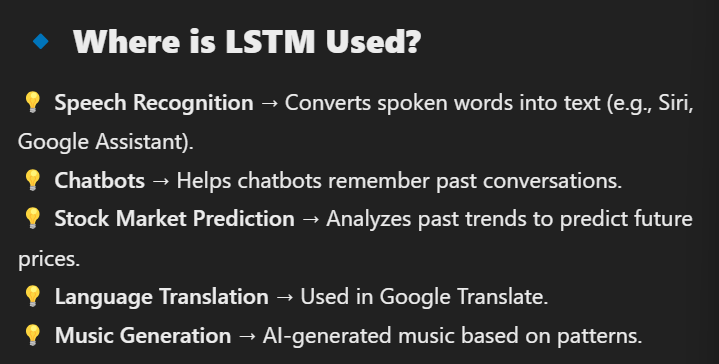

# Text Generation with Neural Networks

Functions for Processing Text

Reading in files as a string text

In [2]:
def read_file(filepath):
  with open(filepath) as f:
        str_text = f.read()

  return str_text





In [3]:
read_file('moby_dick_four_chapters.txt')

'Call me Ishmael.  Some years ago--never mind how long\nprecisely--having little or no money in my purse, and nothing\nparticular to interest me on shore, I thought I would sail about a\nlittle and see the watery part of the world.  It is a way I have of\ndriving off the spleen and regulating the circulation.  Whenever I\nfind myself growing grim about the mouth; whenever it is a damp,\ndrizzly November in my soul; whenever I find myself involuntarily\npausing before coffin warehouses, and bringing up the rear of every\nfuneral I meet; and especially whenever my hypos get such an upper\nhand of me, that it requires a strong moral principle to prevent me\nfrom deliberately stepping into the street, and methodically knocking\npeople\'s hats off--then, I account it high time to get to sea as soon\nas I can.  This is my substitute for pistol and ball.  With a\nphilosophical flourish Cato throws himself upon his sword; I quietly\ntake to the ship.  There is nothing surprising in this.  If t

In [6]:
import spacy
nlp = spacy.load('en_core_web_sm',disable=['parser', 'tagger','ner'])

nlp.max_length = 1198623

In [7]:
def separate_punc(doc_text):
    return [token.text.lower() for token in nlp(doc_text) if token.text not in '\n\n \n\n\n!"-#$%&()--.*+,-/:;<=>?@[\\]^_`{|}~\t\n ']

In [8]:
d = read_file('melville-moby_dick.txt')
tokens = separate_punc(d)

/usr/local/lib/python3.11/dist-packages/spacy/pipeline/lemmatizer.py:211: UserWarning: [W108] The rule-based lemmatizer did not find POS annotation for one or more tokens. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
  warnings.warn(Warnings.W108)


In [9]:
tokens

['chapter',
 '1',
 'loomings',
 'call',
 'me',
 'ishmael',
 'some',
 'years',
 'ago',
 'never',
 'mind',
 'how',
 'long',
 'precisely',
 'having',
 'little',
 'or',
 'no',
 'money',
 'in',
 'my',
 'purse',
 'and',
 'nothing',
 'particular',
 'to',
 'interest',
 'me',
 'on',
 'shore',
 'i',
 'thought',
 'i',
 'would',
 'sail',
 'about',
 'a',
 'little',
 'and',
 'see',
 'the',
 'watery',
 'part',
 'of',
 'the',
 'world',
 'it',
 'is',
 'a',
 'way',
 'i',
 'have',
 'of',
 'driving',
 'off',
 'the',
 'spleen',
 'and',
 'regulating',
 'the',
 'circulation',
 'whenever',
 'i',
 'find',
 'myself',
 'growing',
 'grim',
 'about',
 'the',
 'mouth',
 'whenever',
 'it',
 'is',
 'a',
 'damp',
 'drizzly',
 'november',
 'in',
 'my',
 'soul',
 'whenever',
 'i',
 'find',
 'myself',
 'involuntarily',
 'pausing',
 'before',
 'coffin',
 'warehouses',
 'and',
 'bringing',
 'up',
 'the',
 'rear',
 'of',
 'every',
 'funeral',
 'i',
 'meet',
 'and',
 'especially',
 'whenever',
 'my',
 'hypos',
 'get',
 'such

In [10]:
len(tokens)

214708

Create Sequences of Tokens

In [11]:
# organize into sequences of tokens
train_len = 25+1 # 50 training words , then one target word

# Empty list of sequences
text_sequences = []

for i in range(train_len, len(tokens)):

    # Grab train_len# amount of characters
    seq = tokens[i-train_len:i]

    # Add to list of sequences
    text_sequences.append(seq)

In [12]:
' '.join(text_sequences[0])

'chapter 1 loomings call me ishmael some years ago never mind how long precisely having little or no money in my purse and nothing particular to'

In [13]:
' '.join(text_sequences[1])

'1 loomings call me ishmael some years ago never mind how long precisely having little or no money in my purse and nothing particular to interest'

In [14]:
' '.join(text_sequences[2])

'loomings call me ishmael some years ago never mind how long precisely having little or no money in my purse and nothing particular to interest me'

In [15]:
len(text_sequences)

214682

In [22]:
!pip install tensorflow keras


In [24]:
from tensorflow.keras.preprocessing.text import Tokenizer


In [25]:
# integer encode sequences of words
tokenizer = Tokenizer()
tokenizer.fit_on_texts(text_sequences)
sequences = tokenizer.texts_to_sequences(text_sequences)

In [26]:
sequences[0]

[158,
 9443,
 17526,
 402,
 42,
 1043,
 43,
 247,
 659,
 140,
 296,
 116,
 82,
 787,
 347,
 113,
 36,
 50,
 1788,
 6,
 49,
 3028,
 3,
 218,
 442,
 5]

In [27]:
tokenizer.index_word

{1: 'the',
 2: 'of',
 3: 'and',
 4: 'a',
 5: 'to',
 6: 'in',
 7: 'that',
 8: 'his',
 9: 'it',
 10: 'i',
 11: 'he',
 12: 'but',
 13: "'s",
 14: 'as',
 15: 'with',
 16: 'is',
 17: 'was',
 18: 'for',
 19: 'all',
 20: 'this',
 21: 'at',
 22: 'not',
 23: 'by',
 24: 'whale',
 25: 'from',
 26: 'so',
 27: 'him',
 28: 'on',
 29: 'be',
 30: 'one',
 31: 'you',
 32: 'there',
 33: 'now',
 34: 'had',
 35: 'have',
 36: 'or',
 37: 'were',
 38: 'they',
 39: 'like',
 40: 'which',
 41: 'then',
 42: 'me',
 43: 'some',
 44: 'their',
 45: 'what',
 46: 'when',
 47: 'an',
 48: 'are',
 49: 'my',
 50: 'no',
 51: 'upon',
 52: 'out',
 53: 'man',
 54: 'into',
 55: 'ship',
 56: 'up',
 57: 'more',
 58: 'ahab',
 59: 'if',
 60: 'them',
 61: 'old',
 62: 'we',
 63: 'sea',
 64: 'would',
 65: "'",
 66: 'ye',
 67: 'do',
 68: 'other',
 69: 'been',
 70: 'over',
 71: 'these',
 72: 'will',
 73: 'though',
 74: 'only',
 75: 'its',
 76: 'down',
 77: 'such',
 78: 'who',
 79: 'yet',
 80: 'head',
 81: 'time',
 82: 'long',
 83: 'boat

In [28]:
for i in sequences[0]:
    print(f'{i} : {tokenizer.index_word[i]}')

158 : chapter
9443 : 1
17526 : loomings
402 : call
42 : me
1043 : ishmael
43 : some
247 : years
659 : ago
140 : never
296 : mind
116 : how
82 : long
787 : precisely
347 : having
113 : little
36 : or
50 : no
1788 : money
6 : in
49 : my
3028 : purse
3 : and
218 : nothing
442 : particular
5 : to


In [29]:
tokenizer.word_counts

OrderedDict([('chapter', 4447),
             ('1', 28),
             ('loomings', 3),
             ('call', 1382),
             ('me', 16095),
             ('ishmael', 500),
             ('some', 15789),
             ('years', 2400),
             ('ago', 815),
             ('never', 5262),
             ('mind', 2039),
             ('how', 6330),
             ('long', 8567),
             ('precisely', 690),
             ('having', 1679),
             ('little', 6412),
             ('or', 17879),
             ('no', 14916),
             ('money', 305),
             ('in', 105799),
             ('my', 15231),
             ('purse', 178),
             ('and', 164029),
             ('nothing', 2936),
             ('particular', 1273),
             ('to', 117832),
             ('interest', 442),
             ('on', 26910),
             ('shore', 572),
             ('i', 53430),
             ('thought', 3874),
             ('would', 11232),
             ('sail', 2522),
             ('about', 

In [30]:
vocabulary_size = len(tokenizer.word_counts)

In [31]:
import numpy as np

In [32]:
sequences = np.array(sequences)

In [33]:
sequences

array([[  158,  9443, 17526, ...,   218,   442,     5],
       [ 9443, 17526,   402, ...,   442,     5,  1165],
       [17526,   402,    42, ...,     5,  1165,    42],
       ...,
       [  240,   938,   351, ...,  1419,  1313,    74],
       [  938,   351,  1418, ...,  1313,    74,   219],
       [  351,  1418,     3, ...,    74,   219,   222]])

In [34]:
import keras
from keras.models import Sequential
from keras.layers import Dense,LSTM,Embedding

In [35]:
def create_model(vocabulary_size, seq_len):
    model = Sequential()
    model.add(Embedding(vocabulary_size, 25, input_length=seq_len))
    model.add(LSTM(150, return_sequences=True))
    model.add(LSTM(150))
    model.add(Dense(150, activation='relu'))

    model.add(Dense(vocabulary_size, activation='softmax'))

    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

    model.summary()

    return model

In [36]:
from keras.utils import to_categorical

In [37]:
sequences

array([[  158,  9443, 17526, ...,   218,   442,     5],
       [ 9443, 17526,   402, ...,   442,     5,  1165],
       [17526,   402,    42, ...,     5,  1165,    42],
       ...,
       [  240,   938,   351, ...,  1419,  1313,    74],
       [  938,   351,  1418, ...,  1313,    74,   219],
       [  351,  1418,     3, ...,    74,   219,   222]])

In [38]:
# First 49 words
sequences[:,:-1]

array([[  158,  9443, 17526, ...,     3,   218,   442],
       [ 9443, 17526,   402, ...,   218,   442,     5],
       [17526,   402,    42, ...,   442,     5,  1165],
       ...,
       [  240,   938,   351, ...,    84,  1419,  1313],
       [  938,   351,  1418, ...,  1419,  1313,    74],
       [  351,  1418,     3, ...,  1313,    74,   219]])

In [39]:
# last Word
sequences[:,-1]

array([   5, 1165,   42, ...,   74,  219,  222])

In [40]:
X = sequences[:,:-1]

In [41]:
y = sequences[:,-1]

In [42]:
y = to_categorical(y, num_classes=vocabulary_size+1)

In [43]:
seq_len = X.shape[1]

In [44]:
seq_len

25

In [2]:
# define model
model = create_model(vocabulary_size+1, seq_len)

NameError: name 'create_model' is not defined

In [1]:
from pickle import dump,load

# fit model
model.fit(X, y, batch_size=128, epochs=10,verbose=1)

# save the model to file
model.save('epochBIG.h5')
# save the tokenizer
dump(tokenizer, open('epochBIG', 'wb'))

NameError: name 'model' is not defined

In [ ]:
from random import randint
from pickle import load
from keras.models import load_model
from keras.preprocessing.sequence import pad_sequences

def generate_text(model, tokenizer, seq_len, seed_text, num_gen_words):
    '''
    INPUTS:
    model : model that was trained on text data
    tokenizer : tokenizer that was fit on text data
    seq_len : length of training sequence
    seed_text : raw string text to serve as the seed
    num_gen_words : number of words to be generated by model
    '''

    # Final Output
    output_text = []

    # Intial Seed Sequence
    input_text = seed_text

    # Create num_gen_words
    for i in range(num_gen_words):

        # Take the input text string and encode it to a sequence
        encoded_text = tokenizer.texts_to_sequences([input_text])[0]

        # Pad sequences to our trained rate (50 words in the video)
        pad_encoded = pad_sequences([encoded_text], maxlen=seq_len, truncating='pre')

        # Predict Class Probabilities for each word
        pred_word_ind = model.predict_classes(pad_encoded, verbose=0)[0]

        # Grab word
        pred_word = tokenizer.index_word[pred_word_ind]

        # Update the sequence of input text (shifting one over with the new word)
        input_text += ' ' + pred_word

        output_text.append(pred_word)

    # Make it look like a sentence.
    return ' '.join(output_text)